In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img = image.load_img(r'C:\Users\abida\OneDrive\Desktop\Tranining\Happy/1.jpg')

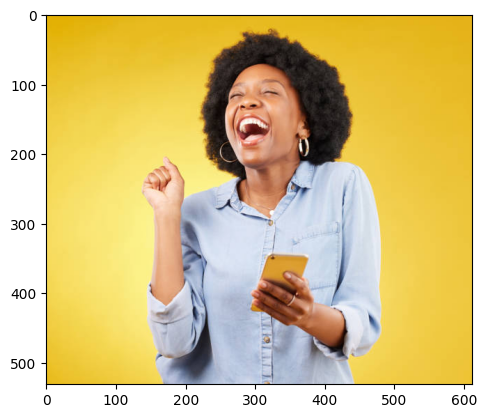

In [3]:
plt.imshow(img)

In [4]:
i1 = cv2.imread(r'C:\Users\abida\OneDrive\Desktop\Tranining\Happy/1.jpg')

In [5]:
i1

array([[[  4, 177, 227],
        [  4, 177, 227],
        [  4, 177, 227],
        ...,
        [ 25, 178, 229],
        [ 25, 178, 229],
        [ 25, 178, 229]],

       [[  4, 177, 227],
        [  4, 177, 227],
        [  4, 177, 227],
        ...,
        [ 25, 178, 229],
        [ 25, 178, 229],
        [ 25, 178, 229]],

       [[  4, 177, 227],
        [  4, 177, 227],
        [  4, 177, 227],
        ...,
        [ 25, 178, 229],
        [ 25, 178, 229],
        [ 25, 178, 229]],

       ...,

       [[ 27, 186, 230],
        [ 27, 186, 230],
        [ 27, 186, 230],
        ...,
        [ 49, 195, 237],
        [ 49, 195, 237],
        [ 49, 195, 237]],

       [[ 27, 186, 230],
        [ 27, 186, 230],
        [ 27, 186, 230],
        ...,
        [ 49, 195, 237],
        [ 49, 195, 237],
        [ 49, 195, 237]],

       [[ 27, 186, 230],
        [ 27, 186, 230],
        [ 27, 186, 230],
        ...,
        [ 49, 195, 237],
        [ 49, 195, 237],
        [ 49, 195, 237]]

In [6]:
i1.shape

(531, 612, 3)

In [7]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset = train.flow_from_directory(r'C:\Users\abida\OneDrive\Desktop\Tranining',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validation.flow_from_directory(r'C:\Users\abida\OneDrive\Desktop\Validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 50 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'Happy': 0, 'Not Happy': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:


model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

c:\Users\abida\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate= 0.001),
              metrics = ['accuracy']
              )

In [14]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 15,
                      )

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.6000 - loss: 4.9294
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.7333 - loss: 0.4512
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.5714 - loss: 1.2838
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6667 - loss: 0.5609 
Epoch 5/15


c:\Users\abida\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.6667 - loss: 0.6438
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.6000 - loss: 0.5621
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.8571 - loss: 0.2972
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.9218 
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.8667 - loss: 0.4993
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9333 - loss: 0.1758
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.9286 - loss: 0.3712
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.2800 
Epoch 13/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.8571 - loss: 0.5292
Epoch 14/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 1.0000 - loss: 0.0778
Epoch 15/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 1.0000 - loss: 0.0784


In [15]:
dir_path = r'C:\Users\abida\OneDrive\Desktop\Testing'
for i in os.listdir(dir_path):
    print(i)

12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
24.jpg
25.jpg


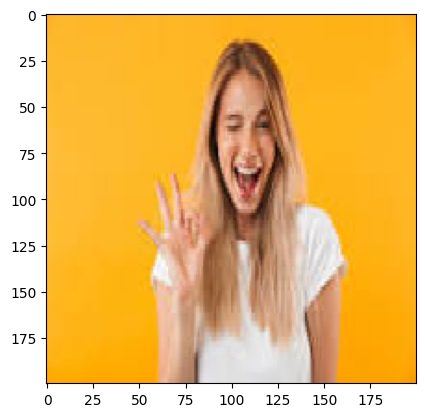

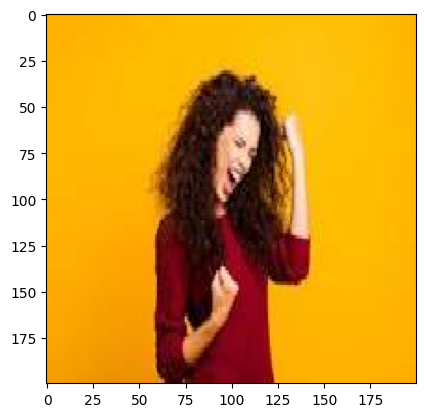

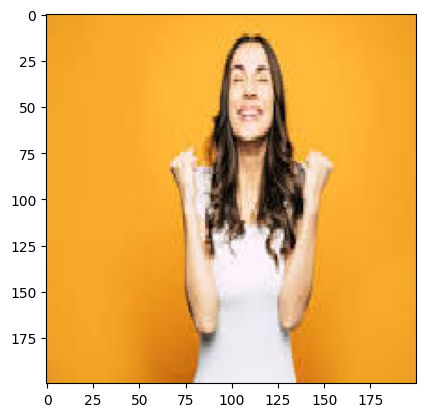

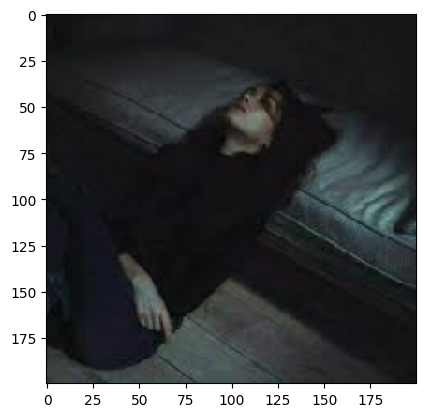

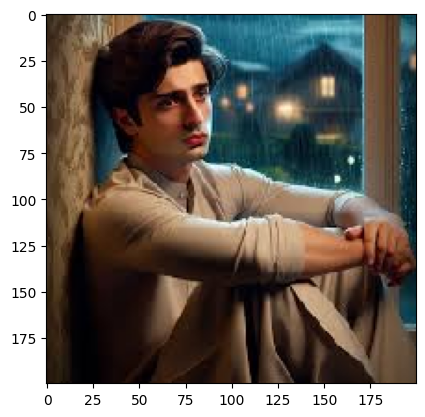

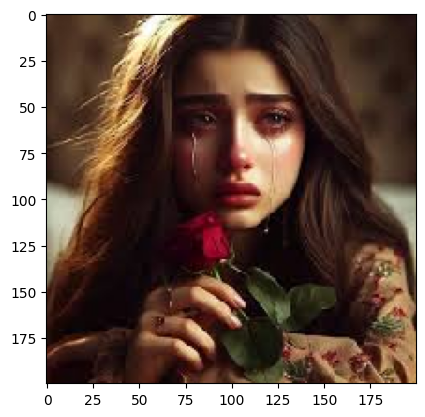

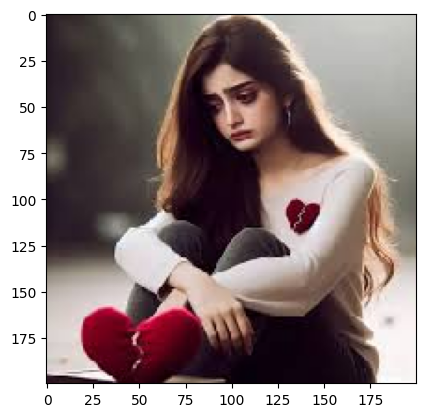

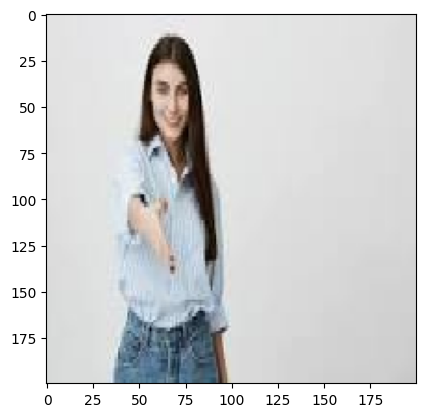

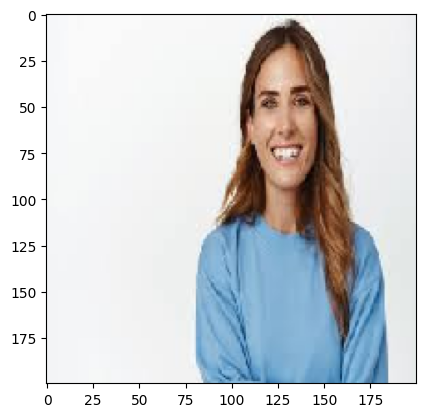

In [16]:
dir_path = r'C:\Users\abida\OneDrive\Desktop\Testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '/' + i, target_size=(200,200))
    plt.imshow(img)
    plt.show()

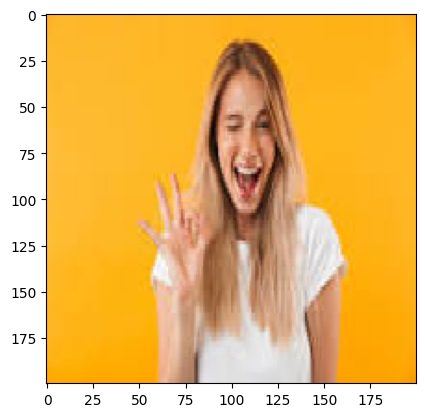

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
 i am happy


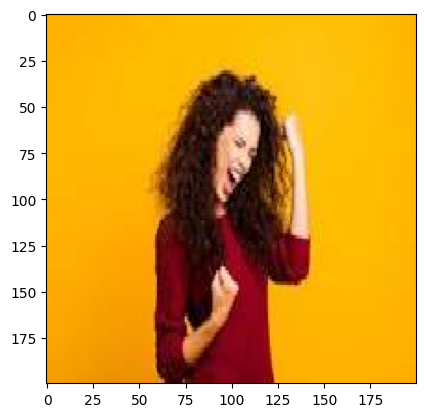

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
 i am happy


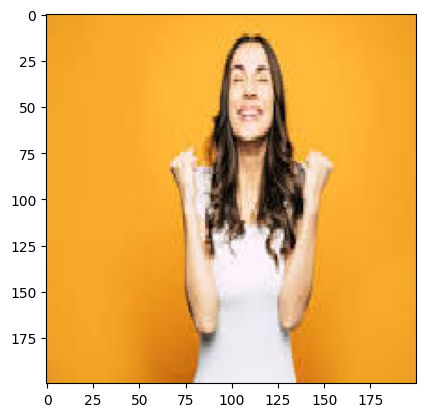

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
 i am happy


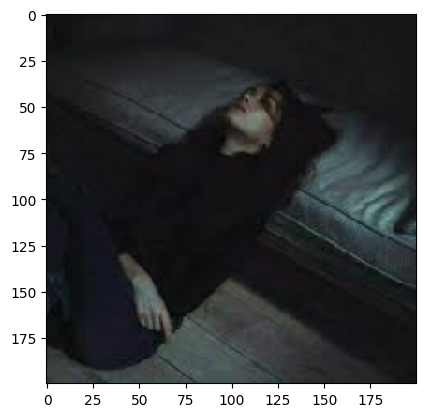

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
i am not happy


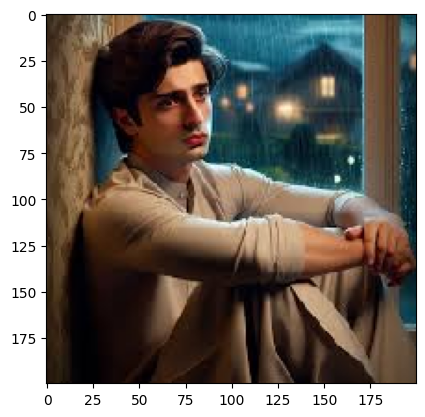

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
 i am happy


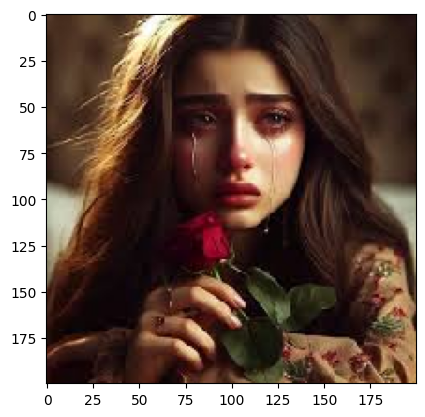

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
 i am happy


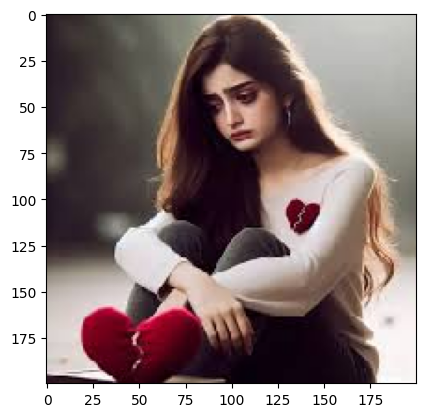

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
 i am happy


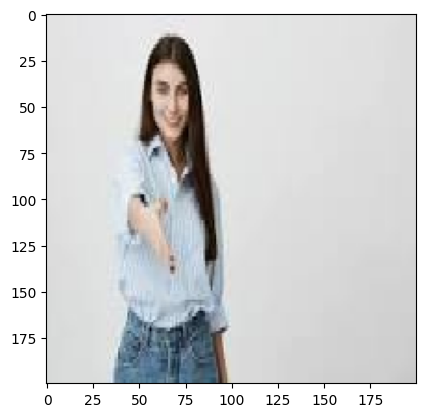

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
 i am happy


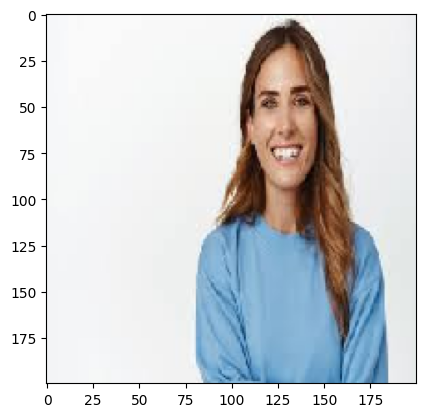

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
 i am happy


In [18]:
dir_path = r'C:\Users\abida\OneDrive\Desktop\Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '/'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( ' i am happy')
    else:
        print('i am not happy')

In [20]:
import gradio as gr
from PIL import Image
import numpy as np

def predict_mood(image):
    img = image.resize((200, 200))
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    
    x = x / 200
    val = model.predict(x)[0][0]
    if val < 0.5:
        return ' Happy'
    else:
        return 'Not Happy'

c:\Users\abida\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
iface = gr.Interface(fn=predict_mood,
                     inputs = gr.Image(type='pil', label='upload an image'),
                     outputs = gr.Textbox(label="predict_mood"),
                     title = "Mood Classification (Happy & Not Happy)",
                     description = 'Upload an image to classify if the person is Happy & Not Happy')
iface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
